# 회귀분석 = 중고차 가격 예측하기

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

In [2]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('./car_data.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [3]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (9874, 6)


,brand,name,ym,km,trans,price
0,6,SM6 2.0 LPe,2017,93459,1,1330
1,3,소나타뉴라이즈 1.6 터보 스마트,2018,37360,1,2000
2,3,그랜저HG HG220 MODERN,2016,128757,1,1299
3,1,G80 3.3 GDI,2018,66480,1,3650
4,1,EQ900 3.8 GDI AWD,2016,186470,1,2790


#### - 분석하지 않을 변수 제외하기

In [4]:
data_df = data_df.drop(['name'], axis=1, inplace=False)
data_df.head()

,brand,ym,km,trans,price
0,6,2017,93459,1,1330
1,3,2018,37360,1,2000
2,3,2016,128757,1,1299
3,1,2018,66480,1,3650
4,1,2016,186470,1,2790


In [5]:
print(' 데이터세트 크기 : ', data_df.shape)

 데이터세트 크기 :  (9874, 5)


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9874 entries, 0 to 9873
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   brand   9874 non-null   int64
 1   ym      9874 non-null   int64
 2   km      9874 non-null   int64
 3   trans   9874 non-null   int64
 4   price   9874 non-null   int64
dtypes: int64(5)
memory usage: 385.8 KB


## 3) 분석 모델 구축

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# X, Y 분할하기
Y = data_df['price']
X = data_df.drop(['price'], axis=1, inplace=False)

In [9]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [10]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [11]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [13]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 718776.564, RMSE : 847.807
R^2(Variance score) : 0.479


In [14]:
print('Y 절편 값: ',  np.round(lr.intercept_))
print('회귀 계수 값: ', np.round(lr.coef_))

Y 절편 값:  -334926.0
회귀 계수 값:  [-216.  167.   -0.  256.]


In [15]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

trans    256.04
ym       167.35
km        -0.00
brand   -215.56
dtype: float64

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

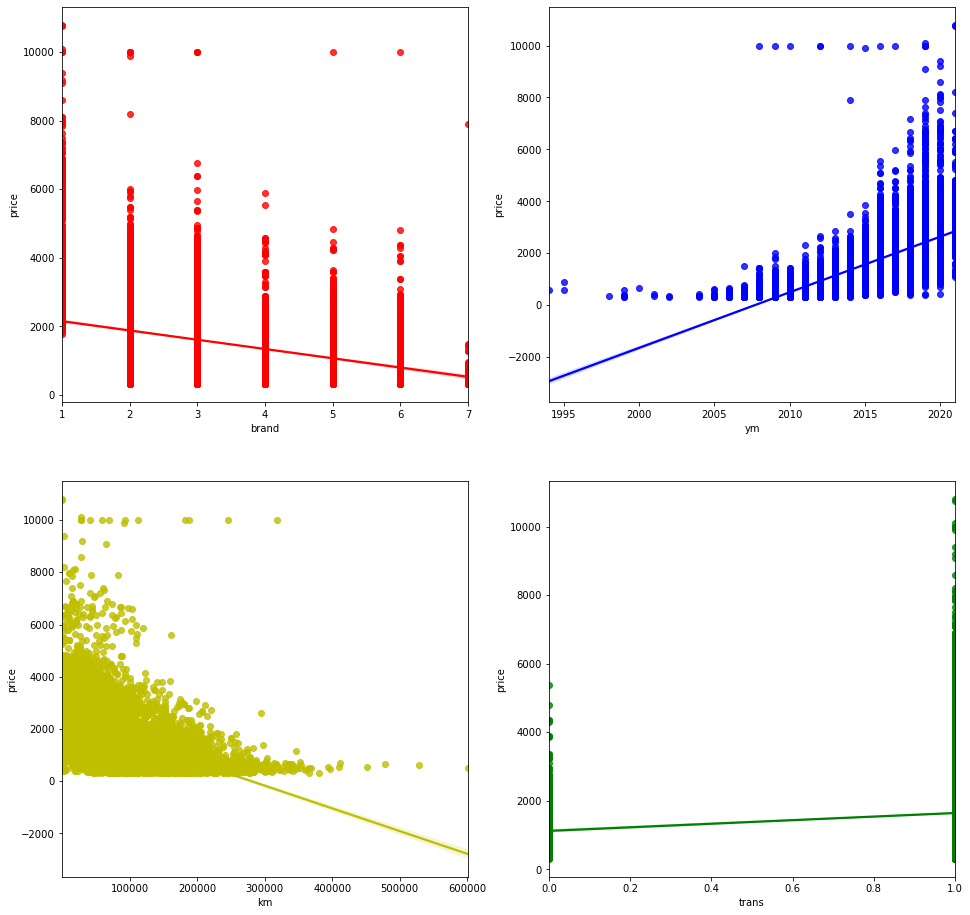

In [17]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=2)

x_features = ['brand', 'ym', 'km', 'trans']
plot_color = ['r', 'b', 'y', 'g']

for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2
      sns.regplot(x=feature, y='price', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 시세 예측하기  >>>>

In [28]:
print("시세를 예측하고 싶은 중고차의 정보를 입력해주세요.")

brand_1 = int(input("brand : "))
year_1 = int(input("year : "))
km_1 = int(input("km : "))
trans_1 = int(input("trans(수동=0, 오토=1) : "))

시세를 예측하고 싶은 중고차의 정보를 입력해주세요.
brand : 1
year : 2020
km : 80000
trans(수동=0, 오토=1) : 1


In [29]:
price_predict = lr.predict([[brand_1, year_1, km_1, trans_1]])

In [30]:
print("이 중고차의 예상 가격은 %d 만원 입니다." %price_predict)

이 중고차의 예상 가격은 2914 만원 입니다.
